In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 128.", name="epoch 500")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(128, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=500, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16768     
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
Total params: 19,993
Trainable params: 19,993
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/500
4/5 [=======================>......] - ETA: 0s - loss: 1.0380 - mae: 0.8761INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 5s 887ms/step - loss: 0.9988 - mae: 0.8547 - val_loss: 0.4270 - val_mae: 0.5277
Epoch 2/500
5/5 [==============================] - ETA: 0s - loss: 0.3170 - mae: 0.4482INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 505ms/step - loss: 0.3170 - mae: 0.4482 - val_loss: 0.1960 - val_mae: 0.3684
Epoch 3/500
5/5 [==============================] - ETA: 0s - loss: 0.1869 - mae: 0.3537INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 516ms/step - loss: 0.1869 - mae: 0.3537 - val_loss: 0.1741 - val_mae: 0.3400
Epoch 4/500
5/5 [==============================] - ETA: 0s - loss: 0.1683 - mae: 0.3356INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 510ms/step - loss: 0.1683 - mae: 0.3356 - val_loss: 0.1381 - val_mae: 0.2981
Epoch 5/500
5/5 [==============================] - ETA: 0s - loss: 0.1283 - mae: 0.2879INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 524ms/step - loss: 0.1283 - mae: 0.2879 - val_loss: 0.1076 - val_mae: 0.2628
Epoch 6/500
5/5 [==============================] - 1s 145ms/step - loss: 0.1109 - mae: 0.2663 - val_loss: 0.1347 - val_mae: 0.2972
Epoch 7/500
5/5 [==============================] - ETA: 0s - loss: 0.1323 - mae: 0.2939INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 482ms/step - loss: 0.1323 - mae: 0.2939 - val_loss: 0.0893 - val_mae: 0.2407
Epoch 8/500
5/5 [==============================] - 1s 181ms/step - loss: 0.1137 - mae: 0.2740 - val_loss: 0.1132 - val_mae: 0.2771
Epoch 9/500
5/5 [==============================] - 1s 143ms/step - loss: 0.0965 - mae: 0.2505 - val_loss: 0.0970 - val_mae: 0.2512
Epoch 10/500
5/5 [==============================] - ETA: 0s - loss: 0.0966 - mae: 0.2483INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 492ms/step - loss: 0.0966 - mae: 0.2483 - val_loss: 0.0842 - val_mae: 0.2336
Epoch 11/500
5/5 [==============================] - ETA: 0s - loss: 0.0833 - mae: 0.2313INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 485ms/step - loss: 0.0833 - mae: 0.2313 - val_loss: 0.0703 - val_mae: 0.2125
Epoch 12/500
5/5 [==============================] - ETA: 0s - loss: 0.0710 - mae: 0.2132INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 509ms/step - loss: 0.0710 - mae: 0.2132 - val_loss: 0.0650 - val_mae: 0.1985
Epoch 13/500
5/5 [==============================] - ETA: 0s - loss: 0.0649 - mae: 0.1966INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0649 - mae: 0.1966 - val_loss: 0.0621 - val_mae: 0.1960
Epoch 14/500
5/5 [==============================] - 1s 159ms/step - loss: 0.0629 - mae: 0.1971 - val_loss: 0.0656 - val_mae: 0.1981
Epoch 15/500
5/5 [==============================] - ETA: 0s - loss: 0.0603 - mae: 0.1898INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 486ms/step - loss: 0.0603 - mae: 0.1898 - val_loss: 0.0592 - val_mae: 0.1900
Epoch 16/500
5/5 [==============================] - ETA: 0s - loss: 0.0589 - mae: 0.1875INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 531ms/step - loss: 0.0589 - mae: 0.1875 - val_loss: 0.0586 - val_mae: 0.1868
Epoch 17/500
5/5 [==============================] - ETA: 0s - loss: 0.0569 - mae: 0.1844INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0569 - mae: 0.1844 - val_loss: 0.0570 - val_mae: 0.1869
Epoch 18/500
5/5 [==============================] - 1s 178ms/step - loss: 0.0558 - mae: 0.1841 - val_loss: 0.0587 - val_mae: 0.1859
Epoch 19/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0556 - mae: 0.1816INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.0554 - mae: 0.1809 - val_loss: 0.0552 - val_mae: 0.1836
Epoch 20/500
5/5 [==============================] - ETA: 0s - loss: 0.0553 - mae: 0.1818INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0553 - mae: 0.1818 - val_loss: 0.0548 - val_mae: 0.1800
Epoch 21/500
5/5 [==============================] - ETA: 0s - loss: 0.0538 - mae: 0.1797INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 495ms/step - loss: 0.0538 - mae: 0.1797 - val_loss: 0.0544 - val_mae: 0.1787
Epoch 22/500
5/5 [==============================] - ETA: 0s - loss: 0.0525 - mae: 0.1763INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 510ms/step - loss: 0.0525 - mae: 0.1763 - val_loss: 0.0525 - val_mae: 0.1777
Epoch 23/500
5/5 [==============================] - ETA: 0s - loss: 0.0520 - mae: 0.1759INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 523ms/step - loss: 0.0520 - mae: 0.1759 - val_loss: 0.0513 - val_mae: 0.1761
Epoch 24/500
5/5 [==============================] - 1s 178ms/step - loss: 0.0512 - mae: 0.1744 - val_loss: 0.0515 - val_mae: 0.1769
Epoch 25/500
5/5 [==============================] - ETA: 0s - loss: 0.0505 - mae: 0.1722INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 477ms/step - loss: 0.0505 - mae: 0.1722 - val_loss: 0.0511 - val_mae: 0.1762
Epoch 26/500
5/5 [==============================] - 1s 165ms/step - loss: 0.0497 - mae: 0.1719 - val_loss: 0.0536 - val_mae: 0.1776
Epoch 27/500
5/5 [==============================] - ETA: 0s - loss: 0.0497 - mae: 0.1711INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 519ms/step - loss: 0.0497 - mae: 0.1711 - val_loss: 0.0497 - val_mae: 0.1697
Epoch 28/500
5/5 [==============================] - ETA: 0s - loss: 0.0494 - mae: 0.1701INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 524ms/step - loss: 0.0494 - mae: 0.1701 - val_loss: 0.0491 - val_mae: 0.1725
Epoch 29/500
5/5 [==============================] - ETA: 0s - loss: 0.0484 - mae: 0.1686INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 512ms/step - loss: 0.0484 - mae: 0.1686 - val_loss: 0.0488 - val_mae: 0.1699
Epoch 30/500
5/5 [==============================] - ETA: 0s - loss: 0.0468 - mae: 0.1660INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 477ms/step - loss: 0.0468 - mae: 0.1660 - val_loss: 0.0479 - val_mae: 0.1674
Epoch 31/500
5/5 [==============================] - 1s 161ms/step - loss: 0.0462 - mae: 0.1652 - val_loss: 0.0480 - val_mae: 0.1679
Epoch 32/500
5/5 [==============================] - ETA: 0s - loss: 0.0448 - mae: 0.1621INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 482ms/step - loss: 0.0448 - mae: 0.1621 - val_loss: 0.0456 - val_mae: 0.1641
Epoch 33/500
5/5 [==============================] - ETA: 0s - loss: 0.0439 - mae: 0.1598INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 525ms/step - loss: 0.0439 - mae: 0.1598 - val_loss: 0.0444 - val_mae: 0.1612
Epoch 34/500
5/5 [==============================] - ETA: 0s - loss: 0.0429 - mae: 0.1578INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 522ms/step - loss: 0.0429 - mae: 0.1578 - val_loss: 0.0440 - val_mae: 0.1604
Epoch 35/500
5/5 [==============================] - ETA: 0s - loss: 0.0426 - mae: 0.1578INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 531ms/step - loss: 0.0426 - mae: 0.1578 - val_loss: 0.0435 - val_mae: 0.1625
Epoch 36/500
5/5 [==============================] - 1s 176ms/step - loss: 0.0438 - mae: 0.1619 - val_loss: 0.0451 - val_mae: 0.1647
Epoch 37/500
5/5 [==============================] - 1s 139ms/step - loss: 0.0420 - mae: 0.1589 - val_loss: 0.0453 - val_mae: 0.1624
Epoch 38/500
5/5 [==============================] - 1s 143ms/step - loss: 0.0430 - mae: 0.1587 - val_loss: 0.0439 - val_mae: 0.1619
Epoch 39/500
5/5 [==============================] - ETA: 0s - loss: 0.0418 - mae: 0.1574INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 492ms/step - loss: 0.0418 - mae: 0.1574 - val_loss: 0.0417 - val_mae: 0.1592
Epoch 40/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0392 - mae: 0.1531INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 0.0397 - mae: 0.1541 - val_loss: 0.0411 - val_mae: 0.1576
Epoch 41/500
5/5 [==============================] - ETA: 0s - loss: 0.0392 - mae: 0.1525INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 500ms/step - loss: 0.0392 - mae: 0.1525 - val_loss: 0.0398 - val_mae: 0.1550
Epoch 42/500
5/5 [==============================] - ETA: 0s - loss: 0.0387 - mae: 0.1526INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 497ms/step - loss: 0.0387 - mae: 0.1526 - val_loss: 0.0397 - val_mae: 0.1547
Epoch 43/500
5/5 [==============================] - ETA: 0s - loss: 0.0380 - mae: 0.1501INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 516ms/step - loss: 0.0380 - mae: 0.1501 - val_loss: 0.0387 - val_mae: 0.1525
Epoch 44/500
5/5 [==============================] - ETA: 0s - loss: 0.0369 - mae: 0.1484INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 0.0369 - mae: 0.1484 - val_loss: 0.0386 - val_mae: 0.1521
Epoch 45/500
5/5 [==============================] - ETA: 0s - loss: 0.0358 - mae: 0.1458INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 0.0358 - mae: 0.1458 - val_loss: 0.0370 - val_mae: 0.1494
Epoch 46/500
5/5 [==============================] - 1s 155ms/step - loss: 0.0355 - mae: 0.1447 - val_loss: 0.0391 - val_mae: 0.1550
Epoch 47/500
5/5 [==============================] - ETA: 0s - loss: 0.0361 - mae: 0.1477INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 527ms/step - loss: 0.0361 - mae: 0.1477 - val_loss: 0.0359 - val_mae: 0.1474
Epoch 48/500
5/5 [==============================] - ETA: 0s - loss: 0.0341 - mae: 0.1431INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0341 - mae: 0.1431 - val_loss: 0.0356 - val_mae: 0.1466
Epoch 49/500
5/5 [==============================] - ETA: 0s - loss: 0.0331 - mae: 0.1402INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 513ms/step - loss: 0.0331 - mae: 0.1402 - val_loss: 0.0338 - val_mae: 0.1433
Epoch 50/500
5/5 [==============================] - ETA: 0s - loss: 0.0317 - mae: 0.1375INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0317 - mae: 0.1375 - val_loss: 0.0332 - val_mae: 0.1421
Epoch 51/500
5/5 [==============================] - ETA: 0s - loss: 0.0312 - mae: 0.1363INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 0.0312 - mae: 0.1363 - val_loss: 0.0322 - val_mae: 0.1396
Epoch 52/500
5/5 [==============================] - ETA: 0s - loss: 0.0307 - mae: 0.1358INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 538ms/step - loss: 0.0307 - mae: 0.1358 - val_loss: 0.0313 - val_mae: 0.1378
Epoch 53/500
5/5 [==============================] - ETA: 0s - loss: 0.0297 - mae: 0.1330INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 545ms/step - loss: 0.0297 - mae: 0.1330 - val_loss: 0.0304 - val_mae: 0.1357
Epoch 54/500
5/5 [==============================] - ETA: 0s - loss: 0.0291 - mae: 0.1314INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 0.0291 - mae: 0.1314 - val_loss: 0.0303 - val_mae: 0.1354
Epoch 55/500
5/5 [==============================] - ETA: 0s - loss: 0.0282 - mae: 0.1301INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 522ms/step - loss: 0.0282 - mae: 0.1301 - val_loss: 0.0298 - val_mae: 0.1344
Epoch 56/500
5/5 [==============================] - 1s 153ms/step - loss: 0.0278 - mae: 0.1288 - val_loss: 0.0301 - val_mae: 0.1366
Epoch 57/500
5/5 [==============================] - ETA: 0s - loss: 0.0276 - mae: 0.1290INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 501ms/step - loss: 0.0276 - mae: 0.1290 - val_loss: 0.0282 - val_mae: 0.1325
Epoch 58/500
5/5 [==============================] - 1s 176ms/step - loss: 0.0265 - mae: 0.1262 - val_loss: 0.0289 - val_mae: 0.1349
Epoch 59/500
5/5 [==============================] - ETA: 0s - loss: 0.0261 - mae: 0.1257INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0261 - mae: 0.1257 - val_loss: 0.0273 - val_mae: 0.1292
Epoch 60/500
5/5 [==============================] - ETA: 0s - loss: 0.0254 - mae: 0.1236INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 534ms/step - loss: 0.0254 - mae: 0.1236 - val_loss: 0.0271 - val_mae: 0.1293
Epoch 61/500
5/5 [==============================] - ETA: 0s - loss: 0.0248 - mae: 0.1225INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 526ms/step - loss: 0.0248 - mae: 0.1225 - val_loss: 0.0259 - val_mae: 0.1271
Epoch 62/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0244 - mae: 0.1219INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 523ms/step - loss: 0.0242 - mae: 0.1211 - val_loss: 0.0256 - val_mae: 0.1265
Epoch 63/500
5/5 [==============================] - ETA: 0s - loss: 0.0236 - mae: 0.1188INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 492ms/step - loss: 0.0236 - mae: 0.1188 - val_loss: 0.0249 - val_mae: 0.1242
Epoch 64/500
5/5 [==============================] - ETA: 0s - loss: 0.0233 - mae: 0.1183INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 491ms/step - loss: 0.0233 - mae: 0.1183 - val_loss: 0.0238 - val_mae: 0.1216
Epoch 65/500
5/5 [==============================] - 1s 164ms/step - loss: 0.0227 - mae: 0.1174 - val_loss: 0.0242 - val_mae: 0.1212
Epoch 66/500
5/5 [==============================] - ETA: 0s - loss: 0.0225 - mae: 0.1168INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 506ms/step - loss: 0.0225 - mae: 0.1168 - val_loss: 0.0225 - val_mae: 0.1178
Epoch 67/500
5/5 [==============================] - 1s 188ms/step - loss: 0.0229 - mae: 0.1182 - val_loss: 0.0226 - val_mae: 0.1193
Epoch 68/500
5/5 [==============================] - 1s 141ms/step - loss: 0.0216 - mae: 0.1151 - val_loss: 0.0245 - val_mae: 0.1251
Epoch 69/500
5/5 [==============================] - ETA: 0s - loss: 0.0218 - mae: 0.1157INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 471ms/step - loss: 0.0218 - mae: 0.1157 - val_loss: 0.0213 - val_mae: 0.1143
Epoch 70/500
5/5 [==============================] - 1s 185ms/step - loss: 0.0214 - mae: 0.1135 - val_loss: 0.0214 - val_mae: 0.1147
Epoch 71/500
5/5 [==============================] - 1s 145ms/step - loss: 0.0204 - mae: 0.1117 - val_loss: 0.0227 - val_mae: 0.1178
Epoch 72/500
5/5 [==============================] - ETA: 0s - loss: 0.0201 - mae: 0.1108INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 475ms/step - loss: 0.0201 - mae: 0.1108 - val_loss: 0.0200 - val_mae: 0.1110
Epoch 73/500
5/5 [==============================] - 1s 178ms/step - loss: 0.0193 - mae: 0.1085 - val_loss: 0.0201 - val_mae: 0.1107
Epoch 74/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0188 - mae: 0.1069 - val_loss: 0.0216 - val_mae: 0.1165
Epoch 75/500
5/5 [==============================] - ETA: 0s - loss: 0.0189 - mae: 0.1081INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0189 - mae: 0.1081 - val_loss: 0.0188 - val_mae: 0.1070
Epoch 76/500
5/5 [==============================] - 1s 163ms/step - loss: 0.0182 - mae: 0.1057 - val_loss: 0.0206 - val_mae: 0.1126
Epoch 77/500
5/5 [==============================] - ETA: 0s - loss: 0.0172 - mae: 0.1026INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 0.0172 - mae: 0.1026 - val_loss: 0.0183 - val_mae: 0.1053
Epoch 78/500
5/5 [==============================] - ETA: 0s - loss: 0.0164 - mae: 0.0998INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0164 - mae: 0.0998 - val_loss: 0.0178 - val_mae: 0.1042
Epoch 79/500
5/5 [==============================] - 1s 160ms/step - loss: 0.0159 - mae: 0.0984 - val_loss: 0.0183 - val_mae: 0.1053
Epoch 80/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0161 - mae: 0.0986INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 509ms/step - loss: 0.0161 - mae: 0.0988 - val_loss: 0.0173 - val_mae: 0.1027
Epoch 81/500
5/5 [==============================] - ETA: 0s - loss: 0.0153 - mae: 0.0966INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 508ms/step - loss: 0.0153 - mae: 0.0966 - val_loss: 0.0173 - val_mae: 0.1024
Epoch 82/500
5/5 [==============================] - ETA: 0s - loss: 0.0161 - mae: 0.0990INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 486ms/step - loss: 0.0161 - mae: 0.0990 - val_loss: 0.0169 - val_mae: 0.1005
Epoch 83/500
5/5 [==============================] - 1s 163ms/step - loss: 0.0152 - mae: 0.0958 - val_loss: 0.0180 - val_mae: 0.1042
Epoch 84/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0152 - mae: 0.0962INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 506ms/step - loss: 0.0155 - mae: 0.0969 - val_loss: 0.0161 - val_mae: 0.0986
Epoch 85/500
5/5 [==============================] - 1s 163ms/step - loss: 0.0151 - mae: 0.0957 - val_loss: 0.0171 - val_mae: 0.1026
Epoch 86/500
5/5 [==============================] - 1s 138ms/step - loss: 0.0147 - mae: 0.0947 - val_loss: 0.0176 - val_mae: 0.1039
Epoch 87/500
5/5 [==============================] - ETA: 0s - loss: 0.0155 - mae: 0.0980INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 491ms/step - loss: 0.0155 - mae: 0.0980 - val_loss: 0.0159 - val_mae: 0.0981
Epoch 88/500
5/5 [==============================] - 1s 167ms/step - loss: 0.0147 - mae: 0.0950 - val_loss: 0.0182 - val_mae: 0.1065
Epoch 89/500
5/5 [==============================] - ETA: 0s - loss: 0.0150 - mae: 0.0961INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 509ms/step - loss: 0.0150 - mae: 0.0961 - val_loss: 0.0150 - val_mae: 0.0950
Epoch 90/500
5/5 [==============================] - 1s 148ms/step - loss: 0.0132 - mae: 0.0899 - val_loss: 0.0168 - val_mae: 0.1015
Epoch 91/500
5/5 [==============================] - 1s 148ms/step - loss: 0.0136 - mae: 0.0912 - val_loss: 0.0154 - val_mae: 0.0963
Epoch 92/500
5/5 [==============================] - 1s 140ms/step - loss: 0.0133 - mae: 0.0903 - val_loss: 0.0166 - val_mae: 0.0999
Epoch 93/500
5/5 [==============================] - ETA: 0s - loss: 0.0137 - mae: 0.0915INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 519ms/step - loss: 0.0137 - mae: 0.0915 - val_loss: 0.0145 - val_mae: 0.0935
Epoch 94/500
5/5 [==============================] - ETA: 0s - loss: 0.0126 - mae: 0.0881INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 515ms/step - loss: 0.0126 - mae: 0.0881 - val_loss: 0.0141 - val_mae: 0.0914
Epoch 95/500
5/5 [==============================] - ETA: 0s - loss: 0.0120 - mae: 0.0856INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 515ms/step - loss: 0.0120 - mae: 0.0856 - val_loss: 0.0138 - val_mae: 0.0905
Epoch 96/500
5/5 [==============================] - ETA: 0s - loss: 0.0120 - mae: 0.0854INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 485ms/step - loss: 0.0120 - mae: 0.0854 - val_loss: 0.0137 - val_mae: 0.0903
Epoch 97/500
5/5 [==============================] - ETA: 0s - loss: 0.0115 - mae: 0.0833INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 527ms/step - loss: 0.0115 - mae: 0.0833 - val_loss: 0.0136 - val_mae: 0.0901
Epoch 98/500
5/5 [==============================] - ETA: 0s - loss: 0.0114 - mae: 0.0833INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 516ms/step - loss: 0.0114 - mae: 0.0833 - val_loss: 0.0133 - val_mae: 0.0892
Epoch 99/500
5/5 [==============================] - ETA: 0s - loss: 0.0111 - mae: 0.0820INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0111 - mae: 0.0820 - val_loss: 0.0131 - val_mae: 0.0883
Epoch 100/500
5/5 [==============================] - 1s 171ms/step - loss: 0.0109 - mae: 0.0815 - val_loss: 0.0134 - val_mae: 0.0902
Epoch 101/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0112 - mae: 0.0825 - val_loss: 0.0147 - val_mae: 0.0962
Epoch 102/500
5/5 [==============================] - ETA: 0s - loss: 0.0119 - mae: 0.0857INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 516ms/step - loss: 0.0119 - mae: 0.0857 - val_loss: 0.0123 - val_mae: 0.0861
Epoch 103/500
5/5 [==============================] - 1s 177ms/step - loss: 0.0108 - mae: 0.0812 - val_loss: 0.0128 - val_mae: 0.0870
Epoch 104/500
5/5 [==============================] - ETA: 0s - loss: 0.0106 - mae: 0.0804INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 0.0106 - mae: 0.0804 - val_loss: 0.0120 - val_mae: 0.0850
Epoch 105/500
5/5 [==============================] - 1s 165ms/step - loss: 0.0106 - mae: 0.0808 - val_loss: 0.0126 - val_mae: 0.0876
Epoch 106/500
5/5 [==============================] - 1s 161ms/step - loss: 0.0103 - mae: 0.0793 - val_loss: 0.0121 - val_mae: 0.0849
Epoch 107/500
5/5 [==============================] - ETA: 0s - loss: 0.0100 - mae: 0.0784INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 519ms/step - loss: 0.0100 - mae: 0.0784 - val_loss: 0.0119 - val_mae: 0.0847
Epoch 108/500
5/5 [==============================] - ETA: 0s - loss: 0.0100 - mae: 0.0784INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 503ms/step - loss: 0.0100 - mae: 0.0784 - val_loss: 0.0114 - val_mae: 0.0826
Epoch 109/500
5/5 [==============================] - 1s 156ms/step - loss: 0.0097 - mae: 0.0771 - val_loss: 0.0115 - val_mae: 0.0838
Epoch 110/500
5/5 [==============================] - ETA: 0s - loss: 0.0096 - mae: 0.0768INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 481ms/step - loss: 0.0096 - mae: 0.0768 - val_loss: 0.0113 - val_mae: 0.0826
Epoch 111/500
5/5 [==============================] - 1s 159ms/step - loss: 0.0095 - mae: 0.0763 - val_loss: 0.0116 - val_mae: 0.0835
Epoch 112/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0097 - mae: 0.0768 - val_loss: 0.0120 - val_mae: 0.0838
Epoch 113/500
5/5 [==============================] - 1s 153ms/step - loss: 0.0102 - mae: 0.0791 - val_loss: 0.0115 - val_mae: 0.0829
Epoch 114/500
5/5 [==============================] - ETA: 0s - loss: 0.0098 - mae: 0.0773INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 521ms/step - loss: 0.0098 - mae: 0.0773 - val_loss: 0.0109 - val_mae: 0.0814
Epoch 115/500
5/5 [==============================] - 1s 188ms/step - loss: 0.0092 - mae: 0.0754 - val_loss: 0.0124 - val_mae: 0.0884
Epoch 116/500
5/5 [==============================] - ETA: 0s - loss: 0.0094 - mae: 0.0757INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 482ms/step - loss: 0.0094 - mae: 0.0757 - val_loss: 0.0104 - val_mae: 0.0785
Epoch 117/500
5/5 [==============================] - 1s 168ms/step - loss: 0.0089 - mae: 0.0741 - val_loss: 0.0113 - val_mae: 0.0828
Epoch 118/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0101 - mae: 0.0790 - val_loss: 0.0113 - val_mae: 0.0826
Epoch 119/500
5/5 [==============================] - 1s 145ms/step - loss: 0.0099 - mae: 0.0781 - val_loss: 0.0127 - val_mae: 0.0881
Epoch 120/500
5/5 [==============================] - ETA: 0s - loss: 0.0095 - mae: 0.0770INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 475ms/step - loss: 0.0095 - mae: 0.0770 - val_loss: 0.0104 - val_mae: 0.0800
Epoch 121/500
5/5 [==============================] - ETA: 0s - loss: 0.0093 - mae: 0.0762INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 515ms/step - loss: 0.0093 - mae: 0.0762 - val_loss: 0.0104 - val_mae: 0.0795
Epoch 122/500
5/5 [==============================] - ETA: 0s - loss: 0.0093 - mae: 0.0764INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 515ms/step - loss: 0.0093 - mae: 0.0764 - val_loss: 0.0103 - val_mae: 0.0801
Epoch 123/500
5/5 [==============================] - 1s 150ms/step - loss: 0.0086 - mae: 0.0730 - val_loss: 0.0110 - val_mae: 0.0837
Epoch 124/500
5/5 [==============================] - ETA: 0s - loss: 0.0086 - mae: 0.0734INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 470ms/step - loss: 0.0086 - mae: 0.0734 - val_loss: 0.0097 - val_mae: 0.0775
Epoch 125/500
5/5 [==============================] - 1s 161ms/step - loss: 0.0080 - mae: 0.0703 - val_loss: 0.0099 - val_mae: 0.0774
Epoch 126/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0081 - mae: 0.0707 - val_loss: 0.0097 - val_mae: 0.0768
Epoch 127/500
5/5 [==============================] - 1s 156ms/step - loss: 0.0082 - mae: 0.0710 - val_loss: 0.0101 - val_mae: 0.0786
Epoch 128/500
5/5 [==============================] - 1s 144ms/step - loss: 0.0086 - mae: 0.0727 - val_loss: 0.0098 - val_mae: 0.0775
Epoch 129/500
5/5 [==============================] - ETA: 0s - loss: 0.0082 - mae: 0.0708INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 507ms/step - loss: 0.0082 - mae: 0.0708 - val_loss: 0.0093 - val_mae: 0.0761
Epoch 130/500
5/5 [==============================] - ETA: 0s - loss: 0.0077 - mae: 0.0687INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 509ms/step - loss: 0.0077 - mae: 0.0687 - val_loss: 0.0091 - val_mae: 0.0745
Epoch 131/500
5/5 [==============================] - 1s 165ms/step - loss: 0.0076 - mae: 0.0683 - val_loss: 0.0091 - val_mae: 0.0743
Epoch 132/500
5/5 [==============================] - 1s 149ms/step - loss: 0.0079 - mae: 0.0698 - val_loss: 0.0098 - val_mae: 0.0773
Epoch 133/500
5/5 [==============================] - 1s 139ms/step - loss: 0.0083 - mae: 0.0711 - val_loss: 0.0097 - val_mae: 0.0765
Epoch 134/500
5/5 [==============================] - 1s 138ms/step - loss: 0.0080 - mae: 0.0698 - val_loss: 0.0113 - val_mae: 0.0827
Epoch 135/500
5/5 [==============================] - 1s 150ms/step - loss: 0.0092 - mae: 0.0761 - val_loss: 0.0097 - val_mae: 0.0764
Epoch 136/500
5/5 [==============================] - ETA: 0s - loss: 0.0086 - mae: 0.0722INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\fil

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 486ms/step - loss: 0.0086 - mae: 0.0722 - val_loss: 0.0088 - val_mae: 0.0743
Epoch 137/500
5/5 [==============================] - 1s 161ms/step - loss: 0.0082 - mae: 0.0715 - val_loss: 0.0101 - val_mae: 0.0813
Epoch 138/500
5/5 [==============================] - 1s 155ms/step - loss: 0.0080 - mae: 0.0704 - val_loss: 0.0113 - val_mae: 0.0859
Epoch 139/500
5/5 [==============================] - ETA: 0s - loss: 0.0083 - mae: 0.0723INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 511ms/step - loss: 0.0083 - mae: 0.0723 - val_loss: 0.0087 - val_mae: 0.0737
Epoch 140/500
5/5 [==============================] - 1s 174ms/step - loss: 0.0079 - mae: 0.0701 - val_loss: 0.0121 - val_mae: 0.0871
Epoch 141/500
5/5 [==============================] - 1s 153ms/step - loss: 0.0093 - mae: 0.0770 - val_loss: 0.0107 - val_mae: 0.0805
Epoch 142/500
5/5 [==============================] - 1s 146ms/step - loss: 0.0083 - mae: 0.0721 - val_loss: 0.0092 - val_mae: 0.0761
Epoch 143/500
5/5 [==============================] - 1s 140ms/step - loss: 0.0074 - mae: 0.0673 - val_loss: 0.0094 - val_mae: 0.0761
Epoch 144/500
5/5 [==============================] - 1s 144ms/step - loss: 0.0074 - mae: 0.0677 - val_loss: 0.0088 - val_mae: 0.0745
Epoch 145/500
5/5 [==============================] - 1s 143ms/step - loss: 0.0070 - mae: 0.0657 - val_loss: 0.0091 - val_mae: 0.0762
Epoch 146/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0072 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 470ms/step - loss: 0.0071 - mae: 0.0661 - val_loss: 0.0086 - val_mae: 0.0739
Epoch 148/500
5/5 [==============================] - 1s 167ms/step - loss: 0.0067 - mae: 0.0639 - val_loss: 0.0090 - val_mae: 0.0756
Epoch 149/500
5/5 [==============================] - ETA: 0s - loss: 0.0069 - mae: 0.0659INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 501ms/step - loss: 0.0069 - mae: 0.0659 - val_loss: 0.0085 - val_mae: 0.0730
Epoch 150/500
5/5 [==============================] - 1s 168ms/step - loss: 0.0069 - mae: 0.0652 - val_loss: 0.0086 - val_mae: 0.0737
Epoch 151/500
5/5 [==============================] - 1s 159ms/step - loss: 0.0068 - mae: 0.0646 - val_loss: 0.0086 - val_mae: 0.0728
Epoch 152/500
5/5 [==============================] - ETA: 0s - loss: 0.0065 - mae: 0.0630INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 491ms/step - loss: 0.0065 - mae: 0.0630 - val_loss: 0.0083 - val_mae: 0.0721
Epoch 153/500
5/5 [==============================] - ETA: 0s - loss: 0.0065 - mae: 0.0633INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 520ms/step - loss: 0.0065 - mae: 0.0633 - val_loss: 0.0082 - val_mae: 0.0719
Epoch 154/500
5/5 [==============================] - 1s 173ms/step - loss: 0.0065 - mae: 0.0628 - val_loss: 0.0089 - val_mae: 0.0756
Epoch 155/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0067 - mae: 0.0642 - val_loss: 0.0089 - val_mae: 0.0755
Epoch 156/500
5/5 [==============================] - 1s 153ms/step - loss: 0.0066 - mae: 0.0642 - val_loss: 0.0085 - val_mae: 0.0723
Epoch 157/500
5/5 [==============================] - 1s 149ms/step - loss: 0.0066 - mae: 0.0639 - val_loss: 0.0087 - val_mae: 0.0734
Epoch 158/500
5/5 [==============================] - 1s 140ms/step - loss: 0.0066 - mae: 0.0632 - val_loss: 0.0099 - val_mae: 0.0776
Epoch 159/500
5/5 [==============================] - 1s 141ms/step - loss: 0.0076 - mae: 0.0689 - val_loss: 0.0090 - val_mae: 0.0733
Epoch 160/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0076 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 485ms/step - loss: 0.0064 - mae: 0.0638 - val_loss: 0.0081 - val_mae: 0.0711
Epoch 165/500
5/5 [==============================] - ETA: 0s - loss: 0.0062 - mae: 0.0616INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 495ms/step - loss: 0.0062 - mae: 0.0616 - val_loss: 0.0077 - val_mae: 0.0690
Epoch 166/500
5/5 [==============================] - 1s 156ms/step - loss: 0.0066 - mae: 0.0636 - val_loss: 0.0078 - val_mae: 0.0693
Epoch 167/500
5/5 [==============================] - 1s 145ms/step - loss: 0.0062 - mae: 0.0624 - val_loss: 0.0080 - val_mae: 0.0702
Epoch 168/500
5/5 [==============================] - 1s 138ms/step - loss: 0.0061 - mae: 0.0612 - val_loss: 0.0078 - val_mae: 0.0689
Epoch 169/500
5/5 [==============================] - 1s 141ms/step - loss: 0.0059 - mae: 0.0598 - val_loss: 0.0079 - val_mae: 0.0700
Epoch 170/500
5/5 [==============================] - 1s 147ms/step - loss: 0.0058 - mae: 0.0595 - val_loss: 0.0084 - val_mae: 0.0716
Epoch 171/500
5/5 [==============================] - 1s 155ms/step - loss: 0.0065 - mae: 0.0632 - val_loss: 0.0083 - val_mae: 0.0716
Epoch 172/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0067 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 520ms/step - loss: 0.0066 - mae: 0.0631 - val_loss: 0.0077 - val_mae: 0.0689
Epoch 174/500
5/5 [==============================] - 1s 181ms/step - loss: 0.0059 - mae: 0.0601 - val_loss: 0.0077 - val_mae: 0.0702
Epoch 175/500
5/5 [==============================] - ETA: 0s - loss: 0.0060 - mae: 0.0605INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 0.0060 - mae: 0.0605 - val_loss: 0.0075 - val_mae: 0.0686
Epoch 176/500
5/5 [==============================] - 1s 165ms/step - loss: 0.0060 - mae: 0.0607 - val_loss: 0.0076 - val_mae: 0.0691
Epoch 177/500
5/5 [==============================] - 1s 157ms/step - loss: 0.0056 - mae: 0.0579 - val_loss: 0.0087 - val_mae: 0.0751
Epoch 178/500
5/5 [==============================] - ETA: 0s - loss: 0.0061 - mae: 0.0613INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 492ms/step - loss: 0.0061 - mae: 0.0613 - val_loss: 0.0071 - val_mae: 0.0667
Epoch 179/500
5/5 [==============================] - 1s 163ms/step - loss: 0.0054 - mae: 0.0575 - val_loss: 0.0075 - val_mae: 0.0677
Epoch 180/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0055 - mae: 0.0576 - val_loss: 0.0079 - val_mae: 0.0688
Epoch 181/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0058 - mae: 0.0593 - val_loss: 0.0080 - val_mae: 0.0697
Epoch 182/500
5/5 [==============================] - 1s 142ms/step - loss: 0.0061 - mae: 0.0614 - val_loss: 0.0072 - val_mae: 0.0673
Epoch 183/500
5/5 [==============================] - 1s 146ms/step - loss: 0.0056 - mae: 0.0579 - val_loss: 0.0074 - val_mae: 0.0682
Epoch 184/500
5/5 [==============================] - 1s 145ms/step - loss: 0.0054 - mae: 0.0573 - val_loss: 0.0074 - val_mae: 0.0689
Epoch 185/500
5/5 [==============================] - 1s 145ms/step - loss: 0.0053 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0053 - mae: 0.0567 - val_loss: 0.0071 - val_mae: 0.0663
Epoch 187/500
5/5 [==============================] - 1s 160ms/step - loss: 0.0053 - mae: 0.0574 - val_loss: 0.0074 - val_mae: 0.0675
Epoch 188/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0055 - mae: 0.0580 - val_loss: 0.0077 - val_mae: 0.0677
Epoch 189/500
5/5 [==============================] - 1s 142ms/step - loss: 0.0053 - mae: 0.0568 - val_loss: 0.0073 - val_mae: 0.0671
Epoch 190/500
5/5 [==============================] - ETA: 0s - loss: 0.0051 - mae: 0.0563INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 471ms/step - loss: 0.0051 - mae: 0.0563 - val_loss: 0.0071 - val_mae: 0.0659
Epoch 191/500
5/5 [==============================] - 1s 164ms/step - loss: 0.0052 - mae: 0.0564 - val_loss: 0.0073 - val_mae: 0.0668
Epoch 192/500
5/5 [==============================] - 1s 156ms/step - loss: 0.0054 - mae: 0.0572 - val_loss: 0.0074 - val_mae: 0.0673
Epoch 193/500
5/5 [==============================] - ETA: 0s - loss: 0.0053 - mae: 0.0570INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 485ms/step - loss: 0.0053 - mae: 0.0570 - val_loss: 0.0071 - val_mae: 0.0669
Epoch 194/500
5/5 [==============================] - 1s 174ms/step - loss: 0.0052 - mae: 0.0569 - val_loss: 0.0079 - val_mae: 0.0692
Epoch 195/500
5/5 [==============================] - 1s 145ms/step - loss: 0.0056 - mae: 0.0595 - val_loss: 0.0081 - val_mae: 0.0714
Epoch 196/500
5/5 [==============================] - 1s 141ms/step - loss: 0.0060 - mae: 0.0610 - val_loss: 0.0073 - val_mae: 0.0667
Epoch 197/500
5/5 [==============================] - 1s 147ms/step - loss: 0.0055 - mae: 0.0584 - val_loss: 0.0095 - val_mae: 0.0774
Epoch 198/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0062 - mae: 0.0625 - val_loss: 0.0073 - val_mae: 0.0666
Epoch 199/500
5/5 [==============================] - 1s 144ms/step - loss: 0.0050 - mae: 0.0545 - val_loss: 0.0071 - val_mae: 0.0671
Epoch 200/500
5/5 [==============================] - ETA: 0s - loss: 0.0048 - mae: 

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0048 - mae: 0.0542 - val_loss: 0.0069 - val_mae: 0.0656
Epoch 201/500
5/5 [==============================] - 1s 169ms/step - loss: 0.0047 - mae: 0.0536 - val_loss: 0.0069 - val_mae: 0.0653
Epoch 202/500
5/5 [==============================] - ETA: 0s - loss: 0.0048 - mae: 0.0540INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 0.0048 - mae: 0.0540 - val_loss: 0.0066 - val_mae: 0.0637
Epoch 203/500
5/5 [==============================] - 1s 170ms/step - loss: 0.0046 - mae: 0.0531 - val_loss: 0.0067 - val_mae: 0.0644
Epoch 204/500
5/5 [==============================] - 1s 155ms/step - loss: 0.0045 - mae: 0.0524 - val_loss: 0.0067 - val_mae: 0.0648
Epoch 205/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0047 - mae: 0.0536 - val_loss: 0.0066 - val_mae: 0.0641
Epoch 206/500
5/5 [==============================] - 1s 146ms/step - loss: 0.0045 - mae: 0.0528 - val_loss: 0.0070 - val_mae: 0.0670
Epoch 207/500
5/5 [==============================] - 1s 145ms/step - loss: 0.0045 - mae: 0.0530 - val_loss: 0.0067 - val_mae: 0.0650
Epoch 208/500
5/5 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0522INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\fil

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 473ms/step - loss: 0.0044 - mae: 0.0522 - val_loss: 0.0065 - val_mae: 0.0636
Epoch 209/500
5/5 [==============================] - 1s 169ms/step - loss: 0.0045 - mae: 0.0525 - val_loss: 0.0066 - val_mae: 0.0635
Epoch 210/500
5/5 [==============================] - 1s 153ms/step - loss: 0.0046 - mae: 0.0529 - val_loss: 0.0065 - val_mae: 0.0637
Epoch 211/500
5/5 [==============================] - 1s 158ms/step - loss: 0.0045 - mae: 0.0526 - val_loss: 0.0067 - val_mae: 0.0653
Epoch 212/500
5/5 [==============================] - 1s 147ms/step - loss: 0.0044 - mae: 0.0520 - val_loss: 0.0073 - val_mae: 0.0684
Epoch 213/500
5/5 [==============================] - 1s 138ms/step - loss: 0.0046 - mae: 0.0541 - val_loss: 0.0069 - val_mae: 0.0674
Epoch 214/500
5/5 [==============================] - ETA: 0s - loss: 0.0043 - mae: 0.0524INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\fil

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 495ms/step - loss: 0.0043 - mae: 0.0524 - val_loss: 0.0065 - val_mae: 0.0638
Epoch 215/500
5/5 [==============================] - 1s 158ms/step - loss: 0.0042 - mae: 0.0505 - val_loss: 0.0074 - val_mae: 0.0699
Epoch 216/500
5/5 [==============================] - 1s 153ms/step - loss: 0.0045 - mae: 0.0532 - val_loss: 0.0066 - val_mae: 0.0649
Epoch 217/500
5/5 [==============================] - ETA: 0s - loss: 0.0042 - mae: 0.0512INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 479ms/step - loss: 0.0042 - mae: 0.0512 - val_loss: 0.0064 - val_mae: 0.0631
Epoch 218/500
5/5 [==============================] - 1s 161ms/step - loss: 0.0041 - mae: 0.0503 - val_loss: 0.0068 - val_mae: 0.0642
Epoch 219/500
5/5 [==============================] - 1s 153ms/step - loss: 0.0042 - mae: 0.0506 - val_loss: 0.0065 - val_mae: 0.0631
Epoch 220/500
5/5 [==============================] - 1s 158ms/step - loss: 0.0040 - mae: 0.0499 - val_loss: 0.0065 - val_mae: 0.0645
Epoch 221/500
5/5 [==============================] - ETA: 0s - loss: 0.0040 - mae: 0.0502INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 481ms/step - loss: 0.0040 - mae: 0.0502 - val_loss: 0.0061 - val_mae: 0.0616
Epoch 222/500
5/5 [==============================] - 1s 171ms/step - loss: 0.0040 - mae: 0.0498 - val_loss: 0.0067 - val_mae: 0.0652
Epoch 223/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0041 - mae: 0.0510 - val_loss: 0.0062 - val_mae: 0.0619
Epoch 224/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0039 - mae: 0.0495 - val_loss: 0.0063 - val_mae: 0.0636
Epoch 225/500
5/5 [==============================] - ETA: 0s - loss: 0.0037 - mae: 0.0485INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 497ms/step - loss: 0.0037 - mae: 0.0485 - val_loss: 0.0060 - val_mae: 0.0610
Epoch 226/500
5/5 [==============================] - 1s 169ms/step - loss: 0.0039 - mae: 0.0495 - val_loss: 0.0062 - val_mae: 0.0627
Epoch 227/500
5/5 [==============================] - 1s 158ms/step - loss: 0.0039 - mae: 0.0485 - val_loss: 0.0061 - val_mae: 0.0625
Epoch 228/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0039 - mae: 0.0494 - val_loss: 0.0064 - val_mae: 0.0645
Epoch 229/500
5/5 [==============================] - 1s 140ms/step - loss: 0.0042 - mae: 0.0514 - val_loss: 0.0060 - val_mae: 0.0605
Epoch 230/500
5/5 [==============================] - ETA: 0s - loss: 0.0041 - mae: 0.0509INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 479ms/step - loss: 0.0041 - mae: 0.0509 - val_loss: 0.0059 - val_mae: 0.0610
Epoch 231/500
5/5 [==============================] - ETA: 0s - loss: 0.0036 - mae: 0.0476INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 529ms/step - loss: 0.0036 - mae: 0.0476 - val_loss: 0.0059 - val_mae: 0.0594
Epoch 232/500
5/5 [==============================] - 1s 163ms/step - loss: 0.0039 - mae: 0.0495 - val_loss: 0.0063 - val_mae: 0.0622
Epoch 233/500
5/5 [==============================] - 1s 147ms/step - loss: 0.0044 - mae: 0.0524 - val_loss: 0.0059 - val_mae: 0.0600
Epoch 234/500
5/5 [==============================] - ETA: 0s - loss: 0.0043 - mae: 0.0523INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 485ms/step - loss: 0.0043 - mae: 0.0523 - val_loss: 0.0057 - val_mae: 0.0602
Epoch 235/500
5/5 [==============================] - 1s 164ms/step - loss: 0.0039 - mae: 0.0500 - val_loss: 0.0059 - val_mae: 0.0614
Epoch 236/500
5/5 [==============================] - 1s 160ms/step - loss: 0.0040 - mae: 0.0500 - val_loss: 0.0072 - val_mae: 0.0675
Epoch 237/500
5/5 [==============================] - 1s 159ms/step - loss: 0.0044 - mae: 0.0527 - val_loss: 0.0081 - val_mae: 0.0732
Epoch 238/500
5/5 [==============================] - 1s 137ms/step - loss: 0.0050 - mae: 0.0560 - val_loss: 0.0066 - val_mae: 0.0641
Epoch 239/500
5/5 [==============================] - 1s 138ms/step - loss: 0.0042 - mae: 0.0508 - val_loss: 0.0061 - val_mae: 0.0604
Epoch 240/500
5/5 [==============================] - 1s 149ms/step - loss: 0.0040 - mae: 0.0496 - val_loss: 0.0061 - val_mae: 0.0610
Epoch 241/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0036 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 478ms/step - loss: 0.0037 - mae: 0.0479 - val_loss: 0.0054 - val_mae: 0.0575
Epoch 254/500
5/5 [==============================] - ETA: 0s - loss: 0.0034 - mae: 0.0467INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 525ms/step - loss: 0.0034 - mae: 0.0467 - val_loss: 0.0054 - val_mae: 0.0579
Epoch 255/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0033 - mae: 0.0451INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 481ms/step - loss: 0.0033 - mae: 0.0452 - val_loss: 0.0052 - val_mae: 0.0569
Epoch 256/500
5/5 [==============================] - 1s 162ms/step - loss: 0.0033 - mae: 0.0453 - val_loss: 0.0053 - val_mae: 0.0573
Epoch 257/500
5/5 [==============================] - 1s 156ms/step - loss: 0.0032 - mae: 0.0447 - val_loss: 0.0054 - val_mae: 0.0571
Epoch 258/500
5/5 [==============================] - 1s 147ms/step - loss: 0.0032 - mae: 0.0448 - val_loss: 0.0054 - val_mae: 0.0579
Epoch 259/500
5/5 [==============================] - 1s 138ms/step - loss: 0.0033 - mae: 0.0454 - val_loss: 0.0055 - val_mae: 0.0577
Epoch 260/500
5/5 [==============================] - 1s 141ms/step - loss: 0.0033 - mae: 0.0452 - val_loss: 0.0055 - val_mae: 0.0582
Epoch 261/500
5/5 [==============================] - ETA: 0s - loss: 0.0032 - mae: 0.0451INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\fil

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 488ms/step - loss: 0.0032 - mae: 0.0451 - val_loss: 0.0050 - val_mae: 0.0554
Epoch 262/500
5/5 [==============================] - 1s 180ms/step - loss: 0.0033 - mae: 0.0458 - val_loss: 0.0056 - val_mae: 0.0594
Epoch 263/500
5/5 [==============================] - ETA: 0s - loss: 0.0033 - mae: 0.0453INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 510ms/step - loss: 0.0033 - mae: 0.0453 - val_loss: 0.0049 - val_mae: 0.0550
Epoch 264/500
5/5 [==============================] - 1s 183ms/step - loss: 0.0030 - mae: 0.0437 - val_loss: 0.0050 - val_mae: 0.0559
Epoch 265/500
5/5 [==============================] - 1s 142ms/step - loss: 0.0030 - mae: 0.0437 - val_loss: 0.0050 - val_mae: 0.0552
Epoch 266/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0030 - mae: 0.0435INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 472ms/step - loss: 0.0030 - mae: 0.0435 - val_loss: 0.0048 - val_mae: 0.0547
Epoch 267/500
5/5 [==============================] - ETA: 0s - loss: 0.0029 - mae: 0.0428INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 533ms/step - loss: 0.0029 - mae: 0.0428 - val_loss: 0.0048 - val_mae: 0.0540
Epoch 268/500
5/5 [==============================] - 1s 181ms/step - loss: 0.0030 - mae: 0.0435 - val_loss: 0.0049 - val_mae: 0.0545
Epoch 269/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0031 - mae: 0.0441 - val_loss: 0.0049 - val_mae: 0.0549
Epoch 270/500
5/5 [==============================] - 1s 144ms/step - loss: 0.0030 - mae: 0.0438 - val_loss: 0.0049 - val_mae: 0.0545
Epoch 271/500
5/5 [==============================] - 1s 145ms/step - loss: 0.0030 - mae: 0.0440 - val_loss: 0.0049 - val_mae: 0.0551
Epoch 272/500
5/5 [==============================] - 1s 138ms/step - loss: 0.0030 - mae: 0.0433 - val_loss: 0.0050 - val_mae: 0.0557
Epoch 273/500
5/5 [==============================] - 1s 146ms/step - loss: 0.0029 - mae: 0.0435 - val_loss: 0.0049 - val_mae: 0.0555
Epoch 274/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0030 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.0028 - mae: 0.0417 - val_loss: 0.0047 - val_mae: 0.0536
Epoch 296/500
5/5 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0418INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 496ms/step - loss: 0.0028 - mae: 0.0418 - val_loss: 0.0046 - val_mae: 0.0531
Epoch 297/500
5/5 [==============================] - 1s 162ms/step - loss: 0.0027 - mae: 0.0412 - val_loss: 0.0047 - val_mae: 0.0529
Epoch 298/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0028 - mae: 0.0421 - val_loss: 0.0047 - val_mae: 0.0545
Epoch 299/500
5/5 [==============================] - 1s 141ms/step - loss: 0.0028 - mae: 0.0418 - val_loss: 0.0047 - val_mae: 0.0533
Epoch 300/500
5/5 [==============================] - 1s 139ms/step - loss: 0.0028 - mae: 0.0418 - val_loss: 0.0046 - val_mae: 0.0529
Epoch 301/500
5/5 [==============================] - ETA: 0s - loss: 0.0027 - mae: 0.0412INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0027 - mae: 0.0412 - val_loss: 0.0045 - val_mae: 0.0526
Epoch 302/500
5/5 [==============================] - 1s 165ms/step - loss: 0.0028 - mae: 0.0418 - val_loss: 0.0048 - val_mae: 0.0540
Epoch 303/500
5/5 [==============================] - 1s 150ms/step - loss: 0.0029 - mae: 0.0424 - val_loss: 0.0052 - val_mae: 0.0574
Epoch 304/500
5/5 [==============================] - 1s 143ms/step - loss: 0.0031 - mae: 0.0442 - val_loss: 0.0049 - val_mae: 0.0548
Epoch 305/500
5/5 [==============================] - 1s 147ms/step - loss: 0.0035 - mae: 0.0467 - val_loss: 0.0084 - val_mae: 0.0720
Epoch 306/500
5/5 [==============================] - 1s 143ms/step - loss: 0.0050 - mae: 0.0562 - val_loss: 0.0098 - val_mae: 0.0810
Epoch 307/500
5/5 [==============================] - 1s 138ms/step - loss: 0.0054 - mae: 0.0589 - val_loss: 0.0060 - val_mae: 0.0608
Epoch 308/500
5/5 [==============================] - 1s 147ms/step - loss: 0.0045 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 0.0026 - mae: 0.0404 - val_loss: 0.0044 - val_mae: 0.0519
Epoch 318/500
5/5 [==============================] - 1s 156ms/step - loss: 0.0026 - mae: 0.0408 - val_loss: 0.0047 - val_mae: 0.0536
Epoch 319/500
5/5 [==============================] - 1s 143ms/step - loss: 0.0028 - mae: 0.0413 - val_loss: 0.0047 - val_mae: 0.0536
Epoch 320/500
5/5 [==============================] - 1s 143ms/step - loss: 0.0027 - mae: 0.0413 - val_loss: 0.0050 - val_mae: 0.0553
Epoch 321/500
5/5 [==============================] - 1s 146ms/step - loss: 0.0031 - mae: 0.0437 - val_loss: 0.0048 - val_mae: 0.0540
Epoch 322/500
5/5 [==============================] - 1s 148ms/step - loss: 0.0026 - mae: 0.0407 - val_loss: 0.0047 - val_mae: 0.0534
Epoch 323/500
5/5 [==============================] - 1s 142ms/step - loss: 0.0027 - mae: 0.0415 - val_loss: 0.0048 - val_mae: 0.0539
Epoch 324/500
5/5 [==============================] - 1s 142ms/step - loss: 0.0029 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 473ms/step - loss: 0.0026 - mae: 0.0404 - val_loss: 0.0044 - val_mae: 0.0516
Epoch 332/500
5/5 [==============================] - 1s 176ms/step - loss: 0.0028 - mae: 0.0416 - val_loss: 0.0045 - val_mae: 0.0525
Epoch 333/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0028 - mae: 0.0420 - val_loss: 0.0053 - val_mae: 0.0574
Epoch 334/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0033 - mae: 0.0454 - val_loss: 0.0049 - val_mae: 0.0553
Epoch 335/500
5/5 [==============================] - 1s 143ms/step - loss: 0.0033 - mae: 0.0457 - val_loss: 0.0055 - val_mae: 0.0591
Epoch 336/500
5/5 [==============================] - 1s 142ms/step - loss: 0.0034 - mae: 0.0462 - val_loss: 0.0073 - val_mae: 0.0663
Epoch 337/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0040 - mae: 0.0500 - val_loss: 0.0057 - val_mae: 0.0597
Epoch 338/500
5/5 [==============================] - 1s 148ms/step - loss: 0.0038 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 0.0026 - mae: 0.0408 - val_loss: 0.0043 - val_mae: 0.0510
Epoch 348/500
5/5 [==============================] - 1s 177ms/step - loss: 0.0026 - mae: 0.0399 - val_loss: 0.0043 - val_mae: 0.0510
Epoch 349/500
5/5 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0387INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 488ms/step - loss: 0.0024 - mae: 0.0387 - val_loss: 0.0041 - val_mae: 0.0503
Epoch 350/500
5/5 [==============================] - 1s 164ms/step - loss: 0.0024 - mae: 0.0395 - val_loss: 0.0043 - val_mae: 0.0515
Epoch 351/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0024 - mae: 0.0386 - val_loss: 0.0043 - val_mae: 0.0518
Epoch 352/500
5/5 [==============================] - 1s 155ms/step - loss: 0.0023 - mae: 0.0385 - val_loss: 0.0042 - val_mae: 0.0501
Epoch 353/500
5/5 [==============================] - 1s 143ms/step - loss: 0.0023 - mae: 0.0378 - val_loss: 0.0044 - val_mae: 0.0519
Epoch 354/500
5/5 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0392INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 479ms/step - loss: 0.0024 - mae: 0.0392 - val_loss: 0.0041 - val_mae: 0.0498
Epoch 355/500
5/5 [==============================] - 1s 166ms/step - loss: 0.0023 - mae: 0.0382 - val_loss: 0.0042 - val_mae: 0.0505
Epoch 356/500
5/5 [==============================] - 1s 141ms/step - loss: 0.0023 - mae: 0.0383 - val_loss: 0.0045 - val_mae: 0.0526
Epoch 357/500
5/5 [==============================] - 1s 138ms/step - loss: 0.0025 - mae: 0.0395 - val_loss: 0.0044 - val_mae: 0.0515
Epoch 358/500
5/5 [==============================] - 1s 133ms/step - loss: 0.0027 - mae: 0.0415 - val_loss: 0.0045 - val_mae: 0.0528
Epoch 359/500
5/5 [==============================] - 1s 141ms/step - loss: 0.0025 - mae: 0.0400 - val_loss: 0.0045 - val_mae: 0.0516
Epoch 360/500
5/5 [==============================] - 1s 140ms/step - loss: 0.0025 - mae: 0.0398 - val_loss: 0.0043 - val_mae: 0.0516
Epoch 361/500
5/5 [==============================] - 1s 146ms/step - loss: 0.0023 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 501ms/step - loss: 0.0023 - mae: 0.0381 - val_loss: 0.0041 - val_mae: 0.0499
Epoch 364/500
5/5 [==============================] - 1s 173ms/step - loss: 0.0022 - mae: 0.0373 - val_loss: 0.0043 - val_mae: 0.0510
Epoch 365/500
5/5 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0386INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 467ms/step - loss: 0.0024 - mae: 0.0386 - val_loss: 0.0040 - val_mae: 0.0490
Epoch 366/500
5/5 [==============================] - 1s 160ms/step - loss: 0.0023 - mae: 0.0378 - val_loss: 0.0041 - val_mae: 0.0503
Epoch 367/500
5/5 [==============================] - 1s 150ms/step - loss: 0.0024 - mae: 0.0385 - val_loss: 0.0040 - val_mae: 0.0491
Epoch 368/500
5/5 [==============================] - 1s 157ms/step - loss: 0.0022 - mae: 0.0372 - val_loss: 0.0040 - val_mae: 0.0493
Epoch 369/500
5/5 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0378INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 508ms/step - loss: 0.0022 - mae: 0.0378 - val_loss: 0.0039 - val_mae: 0.0492
Epoch 370/500
5/5 [==============================] - 1s 171ms/step - loss: 0.0022 - mae: 0.0375 - val_loss: 0.0042 - val_mae: 0.0500
Epoch 371/500
5/5 [==============================] - 1s 166ms/step - loss: 0.0024 - mae: 0.0389 - val_loss: 0.0041 - val_mae: 0.0499
Epoch 372/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0024 - mae: 0.0381INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 480ms/step - loss: 0.0024 - mae: 0.0382 - val_loss: 0.0039 - val_mae: 0.0485
Epoch 373/500
5/5 [==============================] - 1s 185ms/step - loss: 0.0022 - mae: 0.0371 - val_loss: 0.0043 - val_mae: 0.0515
Epoch 374/500
5/5 [==============================] - 1s 148ms/step - loss: 0.0022 - mae: 0.0370 - val_loss: 0.0043 - val_mae: 0.0514
Epoch 375/500
5/5 [==============================] - 1s 138ms/step - loss: 0.0024 - mae: 0.0385 - val_loss: 0.0041 - val_mae: 0.0503
Epoch 376/500
5/5 [==============================] - 1s 143ms/step - loss: 0.0023 - mae: 0.0378 - val_loss: 0.0039 - val_mae: 0.0483
Epoch 377/500
5/5 [==============================] - 1s 140ms/step - loss: 0.0021 - mae: 0.0364 - val_loss: 0.0041 - val_mae: 0.0505
Epoch 378/500
5/5 [==============================] - 1s 155ms/step - loss: 0.0022 - mae: 0.0370 - val_loss: 0.0041 - val_mae: 0.0494
Epoch 379/500
5/5 [==============================] - 1s 144ms/step - loss: 0.0022 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 0.0022 - mae: 0.0374 - val_loss: 0.0039 - val_mae: 0.0480
Epoch 407/500
5/5 [==============================] - 1s 177ms/step - loss: 0.0022 - mae: 0.0368 - val_loss: 0.0042 - val_mae: 0.0503
Epoch 408/500
5/5 [==============================] - 1s 142ms/step - loss: 0.0022 - mae: 0.0369 - val_loss: 0.0042 - val_mae: 0.0509
Epoch 409/500
5/5 [==============================] - 1s 144ms/step - loss: 0.0023 - mae: 0.0376 - val_loss: 0.0041 - val_mae: 0.0501
Epoch 410/500
5/5 [==============================] - 1s 141ms/step - loss: 0.0023 - mae: 0.0379 - val_loss: 0.0040 - val_mae: 0.0492
Epoch 411/500
5/5 [==============================] - 1s 143ms/step - loss: 0.0022 - mae: 0.0375 - val_loss: 0.0040 - val_mae: 0.0493
Epoch 412/500
5/5 [==============================] - 1s 150ms/step - loss: 0.0022 - mae: 0.0373 - val_loss: 0.0041 - val_mae: 0.0500
Epoch 413/500
5/5 [==============================] - 1s 139ms/step - loss: 0.0022 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0022 - mae: 0.0370 - val_loss: 0.0037 - val_mae: 0.0465
Epoch 416/500
5/5 [==============================] - 1s 160ms/step - loss: 0.0019 - mae: 0.0348 - val_loss: 0.0044 - val_mae: 0.0521
Epoch 417/500
5/5 [==============================] - 1s 158ms/step - loss: 0.0022 - mae: 0.0379 - val_loss: 0.0040 - val_mae: 0.0487
Epoch 418/500
5/5 [==============================] - 1s 149ms/step - loss: 0.0023 - mae: 0.0380 - val_loss: 0.0044 - val_mae: 0.0525
Epoch 419/500
5/5 [==============================] - 1s 139ms/step - loss: 0.0025 - mae: 0.0401 - val_loss: 0.0050 - val_mae: 0.0548
Epoch 420/500
5/5 [==============================] - 1s 137ms/step - loss: 0.0031 - mae: 0.0442 - val_loss: 0.0064 - val_mae: 0.0647
Epoch 421/500
5/5 [==============================] - 1s 136ms/step - loss: 0.0039 - mae: 0.0493 - val_loss: 0.0054 - val_mae: 0.0564
Epoch 422/500
5/5 [==============================] - 1s 155ms/step - loss: 0.0040 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 466ms/step - loss: 0.0021 - mae: 0.0364 - val_loss: 0.0037 - val_mae: 0.0465
Epoch 445/500
5/5 [==============================] - 1s 164ms/step - loss: 0.0019 - mae: 0.0346 - val_loss: 0.0040 - val_mae: 0.0492
Epoch 446/500
5/5 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0349INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 480ms/step - loss: 0.0020 - mae: 0.0349 - val_loss: 0.0036 - val_mae: 0.0467
Epoch 447/500
5/5 [==============================] - 1s 164ms/step - loss: 0.0018 - mae: 0.0343 - val_loss: 0.0037 - val_mae: 0.0468
Epoch 448/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0018 - mae: 0.0339 - val_loss: 0.0040 - val_mae: 0.0490
Epoch 449/500
5/5 [==============================] - 1s 160ms/step - loss: 0.0020 - mae: 0.0350 - val_loss: 0.0038 - val_mae: 0.0479
Epoch 450/500
5/5 [==============================] - 1s 146ms/step - loss: 0.0019 - mae: 0.0349 - val_loss: 0.0037 - val_mae: 0.0475
Epoch 451/500
5/5 [==============================] - 1s 138ms/step - loss: 0.0019 - mae: 0.0343 - val_loss: 0.0038 - val_mae: 0.0474
Epoch 452/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0018 - mae: 0.0332INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\fil

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 486ms/step - loss: 0.0018 - mae: 0.0332 - val_loss: 0.0036 - val_mae: 0.0469
Epoch 453/500
5/5 [==============================] - 1s 162ms/step - loss: 0.0017 - mae: 0.0330 - val_loss: 0.0036 - val_mae: 0.0462
Epoch 454/500
5/5 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0337INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 474ms/step - loss: 0.0018 - mae: 0.0337 - val_loss: 0.0035 - val_mae: 0.0461
Epoch 455/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0017 - mae: 0.0331 - val_loss: 0.0036 - val_mae: 0.0464
Epoch 456/500
5/5 [==============================] - 1s 156ms/step - loss: 0.0018 - mae: 0.0332 - val_loss: 0.0038 - val_mae: 0.0486
Epoch 457/500
5/5 [==============================] - 1s 153ms/step - loss: 0.0020 - mae: 0.0354 - val_loss: 0.0038 - val_mae: 0.0476
Epoch 458/500
5/5 [==============================] - 1s 143ms/step - loss: 0.0020 - mae: 0.0356 - val_loss: 0.0039 - val_mae: 0.0492
Epoch 459/500
5/5 [==============================] - 1s 138ms/step - loss: 0.0019 - mae: 0.0351 - val_loss: 0.0039 - val_mae: 0.0489
Epoch 460/500
5/5 [==============================] - 1s 139ms/step - loss: 0.0020 - mae: 0.0352 - val_loss: 0.0039 - val_mae: 0.0487
Epoch 461/500
5/5 [==============================] - ETA: 0s - loss: 0.0018 - mae: 

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 461ms/step - loss: 0.0018 - mae: 0.0344 - val_loss: 0.0035 - val_mae: 0.0463
Epoch 462/500
5/5 [==============================] - 1s 165ms/step - loss: 0.0019 - mae: 0.0349 - val_loss: 0.0037 - val_mae: 0.0469
Epoch 463/500
5/5 [==============================] - 1s 150ms/step - loss: 0.0019 - mae: 0.0348 - val_loss: 0.0037 - val_mae: 0.0471
Epoch 464/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0018 - mae: 0.0341 - val_loss: 0.0035 - val_mae: 0.0459
Epoch 465/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0020 - mae: 0.0357 - val_loss: 0.0038 - val_mae: 0.0475
Epoch 466/500
5/5 [==============================] - 1s 149ms/step - loss: 0.0019 - mae: 0.0340 - val_loss: 0.0038 - val_mae: 0.0483
Epoch 467/500
5/5 [==============================] - 1s 150ms/step - loss: 0.0019 - mae: 0.0351 - val_loss: 0.0039 - val_mae: 0.0492
Epoch 468/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0021 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 462ms/step - loss: 0.0018 - mae: 0.0339 - val_loss: 0.0035 - val_mae: 0.0457
Epoch 486/500
5/5 [==============================] - 1s 161ms/step - loss: 0.0018 - mae: 0.0335 - val_loss: 0.0037 - val_mae: 0.0476
Epoch 487/500
5/5 [==============================] - 1s 156ms/step - loss: 0.0018 - mae: 0.0335 - val_loss: 0.0039 - val_mae: 0.0492
Epoch 488/500
5/5 [==============================] - 1s 147ms/step - loss: 0.0018 - mae: 0.0339 - val_loss: 0.0039 - val_mae: 0.0488
Epoch 489/500
5/5 [==============================] - 1s 142ms/step - loss: 0.0020 - mae: 0.0360 - val_loss: 0.0040 - val_mae: 0.0492
Epoch 490/500
5/5 [==============================] - 1s 137ms/step - loss: 0.0022 - mae: 0.0374 - val_loss: 0.0038 - val_mae: 0.0474
Epoch 491/500
5/5 [==============================] - 1s 148ms/step - loss: 0.0020 - mae: 0.0354 - val_loss: 0.0042 - val_mae: 0.0507
Epoch 492/500
5/5 [==============================] - 1s 153ms/step - loss: 0.0022 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 480ms/step - loss: 0.0019 - mae: 0.0349 - val_loss: 0.0035 - val_mae: 0.0457
Epoch 496/500
5/5 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0343INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_184213-1cudq716\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 515ms/step - loss: 0.0019 - mae: 0.0343 - val_loss: 0.0033 - val_mae: 0.0453
Epoch 497/500
5/5 [==============================] - 1s 178ms/step - loss: 0.0016 - mae: 0.0322 - val_loss: 0.0036 - val_mae: 0.0466
Epoch 498/500
5/5 [==============================] - 1s 157ms/step - loss: 0.0017 - mae: 0.0323 - val_loss: 0.0038 - val_mae: 0.0480
Epoch 499/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0019 - mae: 0.0354 - val_loss: 0.0037 - val_mae: 0.0475
Epoch 500/500
5/5 [==============================] - 1s 147ms/step - loss: 0.0019 - mae: 0.0341 - val_loss: 0.0038 - val_mae: 0.0484


In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 91ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.3397946, 1.654118 , 1.7847469, 1.8794206, 1.9137415, 2.0324543,
        1.7086567, 2.0141737, 1.9299096, 1.8601335, 1.9602326, 2.2177312,
        1.5314088, 1.8870115, 1.892249 , 1.7932365, 2.0783246, 2.1071825,
        2.103045 , 2.1556659, 1.9102707, 2.288017 , 2.180333 , 2.471088 ,
        1.6433904]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

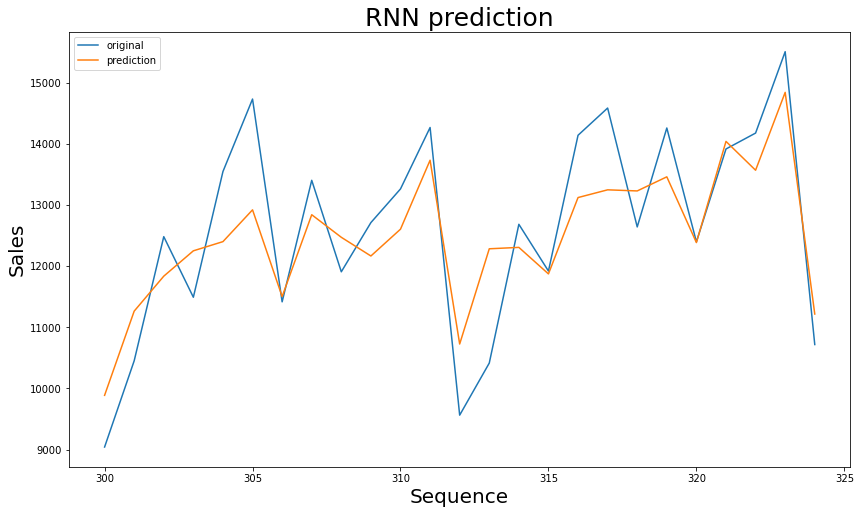

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 22ms/step - loss: 0.0386 - mae: 0.1651


[0.03858871012926102, 0.1651405692100525]